In [1]:
!pip install geopandas
!pip install utm

In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data={'Id':[0,1,2,3,4]}
data.update({'Nombre':['Farmacias Ahumada','Farmacia Cruz Verde','Farmacia Cruz Verde','Farmacia Homeopatica','Farmacia Salcobrand']})
data.update({'Numeracion':[ 6345,6459,6602,7785,8111]})
data.update({'Calle':['Av Vitacura','Av Vitacura','Av Vitacura','Av Vitacura','Av Vitacura',]})
data.update({'Comuna':['Vitacura','Vitacura','Vitacura','Vitacura','Vitacura']})
data.update({'Apertura':['8:30','10:00','0:00',None,'8:00']})
data.update({'Cierre':['0:00','21:00','23:30',None,'21:00']})
data.update({'Coord':[(-33.390038,-70.57308),(-33.389525,-70.569327),(-33.388813,-70.568401),(-33.385862,-70.559234),(-33.385445,-70.555948)]})
farmacias=pd.DataFrame(data)
farmacias.head()

,Id,Nombre,Numeracion,Calle,Comuna,Apertura,Cierre,Coord
0,0,Farmacias Ahumada,6345,Av Vitacura,Vitacura,8:30,0:00,"(-33.390038, -70.57308)"
1,1,Farmacia Cruz Verde,6459,Av Vitacura,Vitacura,10:00,21:00,"(-33.389525, -70.569327)"
2,2,Farmacia Cruz Verde,6602,Av Vitacura,Vitacura,0:00,23:30,"(-33.388813, -70.568401)"
3,3,Farmacia Homeopatica,7785,Av Vitacura,Vitacura,None,None,"(-33.385862, -70.559234)"
4,4,Farmacia Salcobrand,8111,Av Vitacura,Vitacura,8:00,21:00,"(-33.385445, -70.555948)"


In [4]:
data=dict()
data.update({'Nombre':['BETINA 24 MG X 30 COMPRIMIDOS', 'VONTROL 30 COMPRIMIDOS', 'CARDIOASPIRINA 100 MG X50 COMPRIMIDOS', 'BISOPRIL 1,25 MG', 'LEODRIN PLUS 5600', 'SULIX 04 MG X 100 CAPSULAS', 'CILOKARE 25 MG', 'ECTIEN XR 150 MG', 'CARVEDILOL 12,5 MG', 'VASTAREL MR', 'SIAFIL 100 MG X 6 COMPRIMIDOS' ,'TRAMADOL GOTAS (GENFAR)', 'ARRUMAL 30 MG']})
data.update({'Precios':[11.900,8.900,6.550,3.970,22.840,2.300,3.200,23.690,1.070,12.590,1.600,390,29.240]})
data.update({'Farmacias':['1-2','1-3','2-3-4','0-4','1-4','1-3-4','0','2','3-4','1-2-4','0-1','2-4','2-3']})
remedios=pd.DataFrame(data)
remedios.head(10)


,Nombre,Precios,Farmacias
0,BETINA 24 MG X 30 COMPRIMIDOS,11.90,1-2
1,VONTROL 30 COMPRIMIDOS,8.90,1-3
2,CARDIOASPIRINA 100 MG X50 COMPRIMIDOS,6.55,2-3-4
3,"BISOPRIL 1,25 MG",3.97,0-4
4,LEODRIN PLUS 5600,22.84,1-4
5,SULIX 04 MG X 100 CAPSULAS,2.30,1-3-4
6,CILOKARE 25 MG,3.20,0
7,ECTIEN XR 150 MG,23.69,2
8,"CARVEDILOL 12,5 MG",1.07,3-4
9,VASTAREL MR,12.59,1-2-4


In [0]:
from shapely.geometry import Point
import utm
def to_point(x):
  return Point(utm.from_latlon(x[0],x[1]))
farmacias['Coord']=farmacias['Coord'].apply(to_point)


In [0]:
comunas=gpd.read_file('Comunas.shp')
gdf_farmacias=gpd.GeoDataFrame(farmacias,geometry=farmacias['Coord'])
del farmacias['Coord']

In [0]:

def farmaco(rem):
  print('Indice del remedio (0-9)')
  i=2
  med=rem.iloc[i]
  x=med['Farmacias']
  x=x.split("-")
  locations=[]
  for e in x:
    locations.append(int(e))
  return locations




Indice del remedio (0-9)


,Id,Nombre,Numeracion,Calle,Comuna,Apertura,Cierre,geometry
2,2,Farmacia Cruz Verde,6602,Av Vitacura,Vitacura,0:00,23:30,POINT Z (354125.272 6304508.949 0.000)
3,3,Farmacia Homeopatica,7785,Av Vitacura,Vitacura,None,None,POINT Z (354973.064 6304848.977 0.000)
4,4,Farmacia Salcobrand,8111,Av Vitacura,Vitacura,8:00,21:00,POINT Z (355278.039 6304899.789 0.000)


,ID,COMUNA,REGION,1_POB_2002,AREA,geometry
48,52,VITACURA,REGION METROPOLITANA DE SANTIAGO,81499,28286699,"POLYGON ((350739.714 6302179.987, 350735.924 6..."


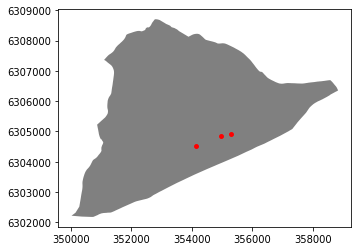

In [8]:
x=farmaco(remedios)
lugar=gdf_farmacias.iloc[x]
display(lugar.head())
fig,ax=plt.subplots()
comunas.loc[comunas['COMUNA']=="VITACURA"].plot(ax=ax, color='grey')
lugar.plot(ax=ax,markersize=15,color='red',marker='o')
display(comunas.loc[comunas['COMUNA']=="VITACURA"].head())